# This is heart disease prediction Project

we are going to predict based on data  that someone have heart disease or not

# we have Blue Print

* 1- Problem Definatiom
* 2- Data Collection
* 3- Evaluate 
* 4- Feature
* 5- Modelling
* 6- Experimentation

# 1- Problem Definatiom
> based on given data we need to predict patience have Hear diesease or not

# 2- Data Collection
> we have data and have loaded it already

# 3- Evaluate 
> In initaial stage we need to make sure if our model gives us 95% accuracy

# 4- Feature
> what features are important , what feature coloumns means what

> 
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to


10 of 14 columns

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak


# Tools Prepration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Models of Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Import evaluation Libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve


# Exploring the Data Initial Stage
* 1- what problem i am going to solve
* 2- what kind of data I have
* 3- Doeas this data have missing values
* 4- are there any outliers, sporious vectors
* 5- can we add or remove some features

In [2]:
df = pd.read_csv('heart.csv')
df.shape

(1025, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df['target'].value_counts() # check how many have disease

target
1    526
0    499
Name: count, dtype: int64

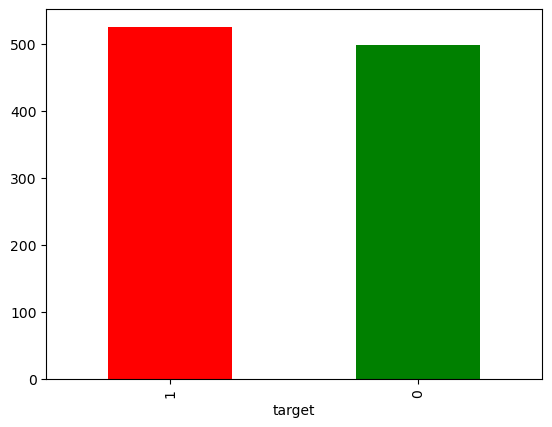

In [6]:
df['target'].value_counts().plot(kind="bar",color=['red','green']);

In [7]:
df.isna().sum() # check missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe() # give data statistics

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.sex.value_counts() # total data 70% male 30 female

sex
1    713
0    312
Name: count, dtype: int64

In [10]:
len(df)

1025

In [11]:
# Compare two columns
pd.crosstab(df.target,df.sex) # 713 male me sy 300 ko disease hay 413 ko nahi same for female

sex,0,1
target,,
0,86,413
1,226,300


C:\Users\Nexus Telecom - YOGA\AppData\Local\Temp\ipykernel_11432\4218877548.py:7: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("Male","Female")


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

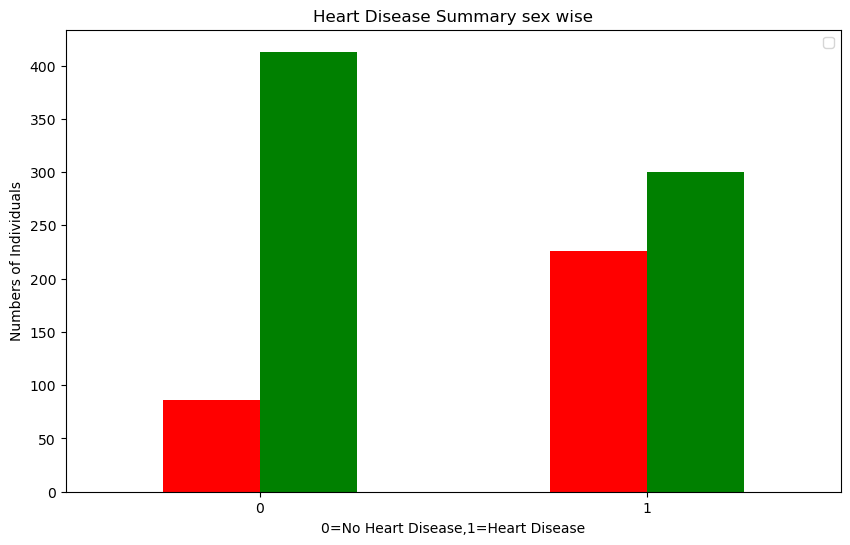

In [12]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['red','green'])
plt.title('Heart Disease Summary sex wise')
plt.xlabel('0=No Heart Disease,1=Heart Disease')
plt.ylabel("Numbers of Individuals")
plt.legend("Male","Female")
plt.xticks(rotation=0)

C:\Users\Nexus Telecom - YOGA\AppData\Local\Temp\ipykernel_11432\30615182.py:8: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("Male","Female")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]),
 [Text(0, 0, '71'),
  Text(1, 0, '88'),
  Text(2, 0, '90'),
  Text(3, 0, '95'),
  Text(4, 0, '96'),
  Text(5, 0, '97'),
  Text(6, 0, '99'),
  Text(7, 0, '103'),
  Text(8, 0, '105'),
  Text(9, 0, '106'),
  Text(10, 0, '108'),
  Text(11, 0, '109'),
  Text(12, 0, '111'),
  Text(13, 0, '112'),
  Text(14, 0, '113'),
  Text(15, 0, '114'),
  Text(16, 0, '115'),
  Text(17, 0, '116'),
  Text(18, 0, '117'),
  Text(19, 0, '118'),
  Text(20, 0, '120'),
  Text(21, 0, '121'),
  Text(22, 0, '122'),
  Text(23, 0, '123'),
  Text(24, 0, '124'),
  Text(25, 0, '125'),
  Text(26, 0, '126'),
  Text(27

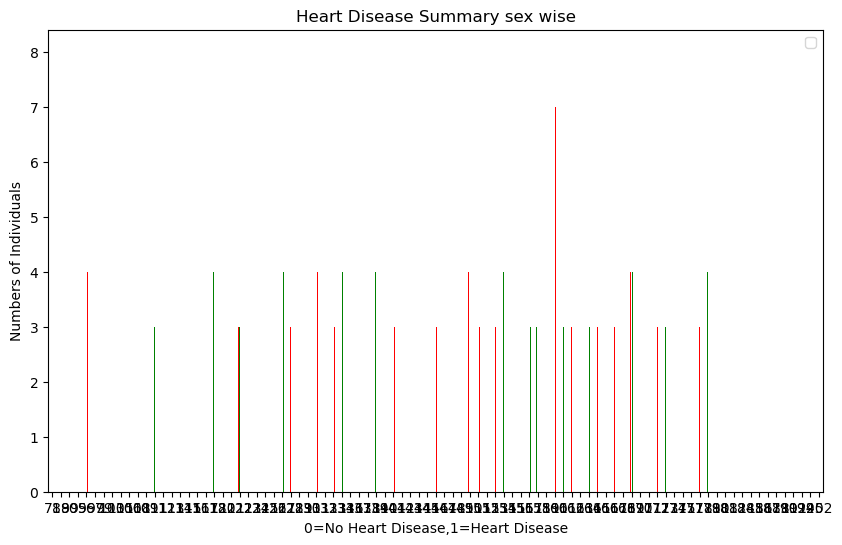

In [13]:
# Finding Patterns in data using wrong Plot bar according to data
pd.crosstab(df.thalach,df.age).plot(kind='bar',       # using wrong plot type
                                   figsize=(10,6),
                                   color=['red','green'])
plt.title('Heart Disease Summary sex wise')
plt.xlabel('0=No Heart Disease,1=Heart Disease')
plt.ylabel("Numbers of Individuals")
plt.legend("Male","Female")
plt.xticks(rotation=0)

In [14]:
df.thalach.value_counts() # 91 dif values so bar plot is not suitabke

thalach
162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: count, Length: 91, dtype: int64

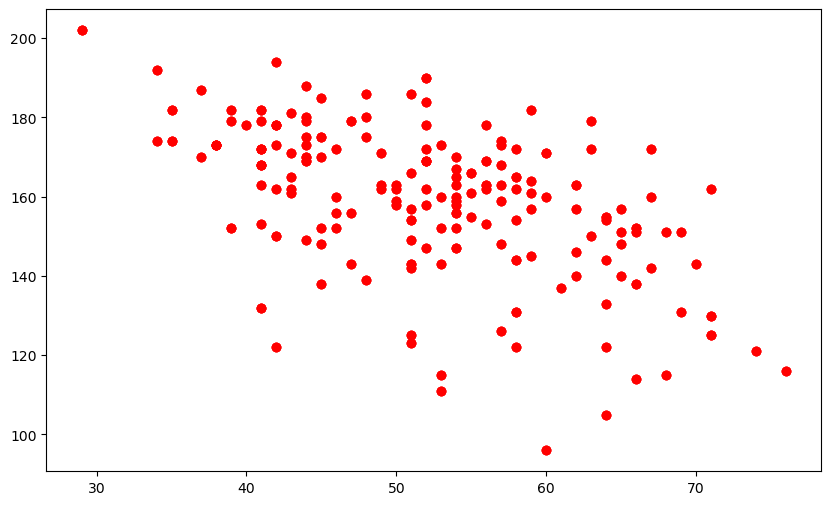

In [15]:
# Finding Patterns in data using scatter Plot  (right plot) Check pattern who have heart disease
plt.figure(figsize=(10,6))
# create scatter plot
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="red");

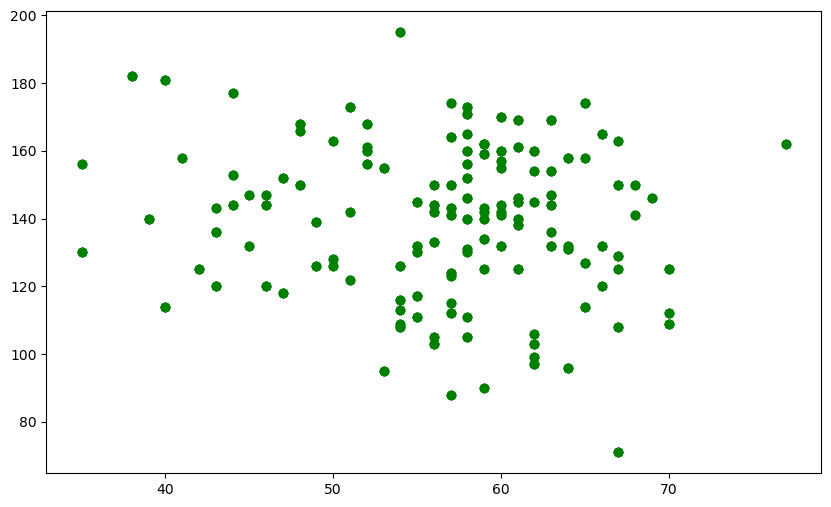

In [16]:
# Finding Patterns in data using scatter Plot  (right plot) Check pattern who dont have heart disease
plt.figure(figsize=(10,6))
# create scatter plot
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="green");

C:\Users\Nexus Telecom - YOGA\AppData\Local\Temp\ipykernel_11432\3214831391.py:10: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("Heart Prob","No Heart Prob")


(array([20., 30., 40., 50., 60., 70., 80.]),
 [Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

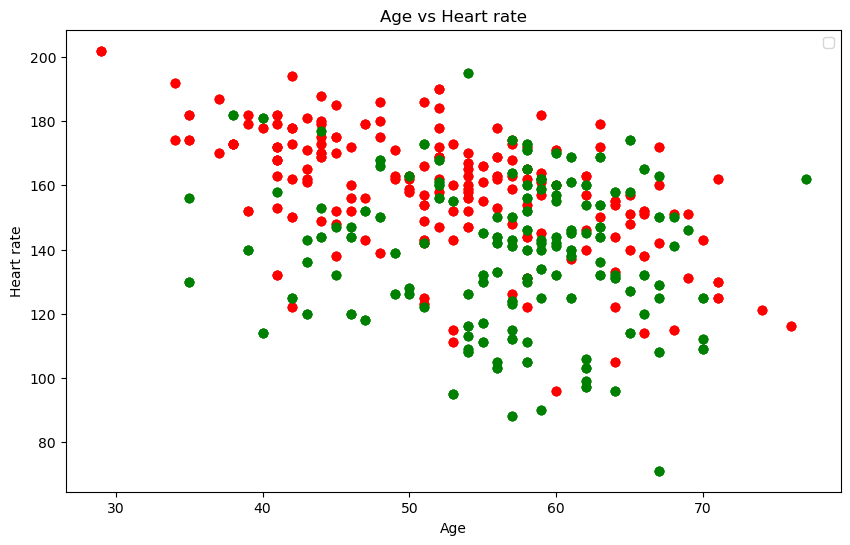

In [17]:
# Finding Patterns in data using scatter Plot  (right plot) Check both
plt.figure(figsize=(10,6))
# create scatter plot
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="red");
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="green");

plt.title('Age vs Heart rate')
plt.xlabel('Age')
plt.ylabel("Heart rate")
plt.legend("Heart Prob","No Heart Prob")
plt.xticks(rotation=0)

<Axes: ylabel='Frequency'>

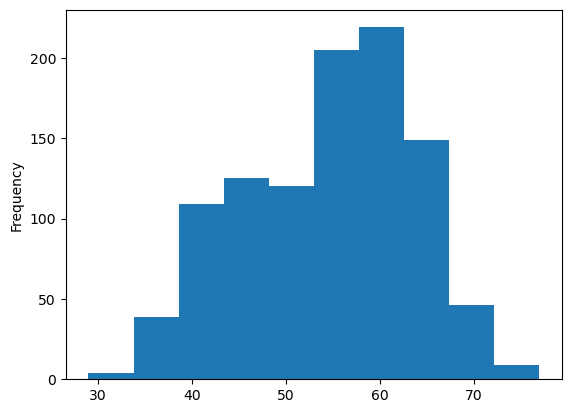

In [18]:
# Create Histogram to see age distribution, and check age have any relation with heart disease (gaussian distribution )values skewed towards higher age
# also histogram check Outliers
df.age.plot.hist()

In [19]:
df.cp.value_counts() # four values so we can plot using bar

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

* cp: chest pain type
* -- Value 0: typical angina   chest pain due to decrease blood pressue
* -- Value 1: atypical angina  chest pain not related to hear problem
* -- Value 2: Non-anginaa pain  not heart related
* -- Value 3: asymptomatic    chest pain not showing heart problem


In [20]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


C:\Users\Nexus Telecom - YOGA\AppData\Local\Temp\ipykernel_11432\2773948425.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("No Heart Prob","Heart Prob")


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

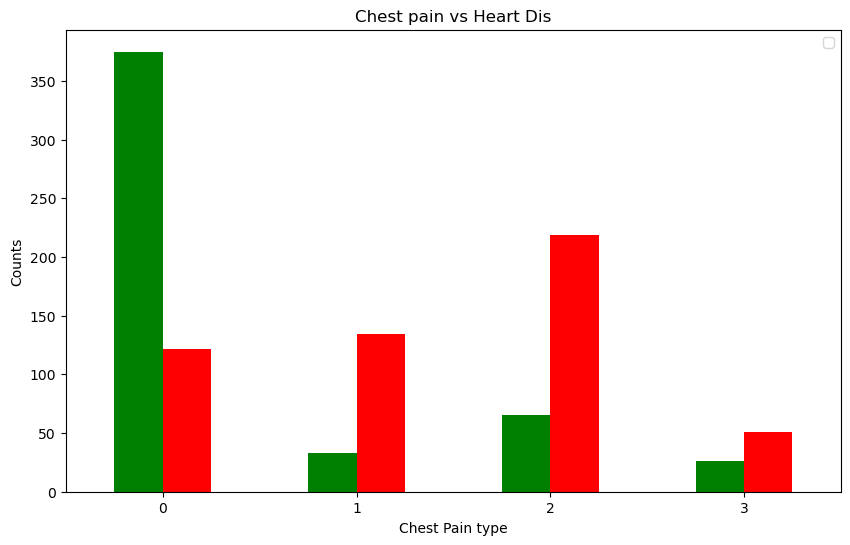

In [21]:
# Make the bar plot of chest pain vs Target
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['green','red'])
plt.title('Chest pain vs Heart Dis')
plt.xlabel('Chest Pain type')
plt.ylabel("Counts")
plt.legend("No Heart Prob","Heart Prob")
plt.xticks(rotation=0)

plt.xticks(rotation=0)

# Correlation Matrix

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [23]:
# 1-Diagnal value is always 1 (Khud kay sth coorelation is always 1)
# + correlation  one value increase other also increase, directly
# - Corellation  one value increase other decrease,  Inverse
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


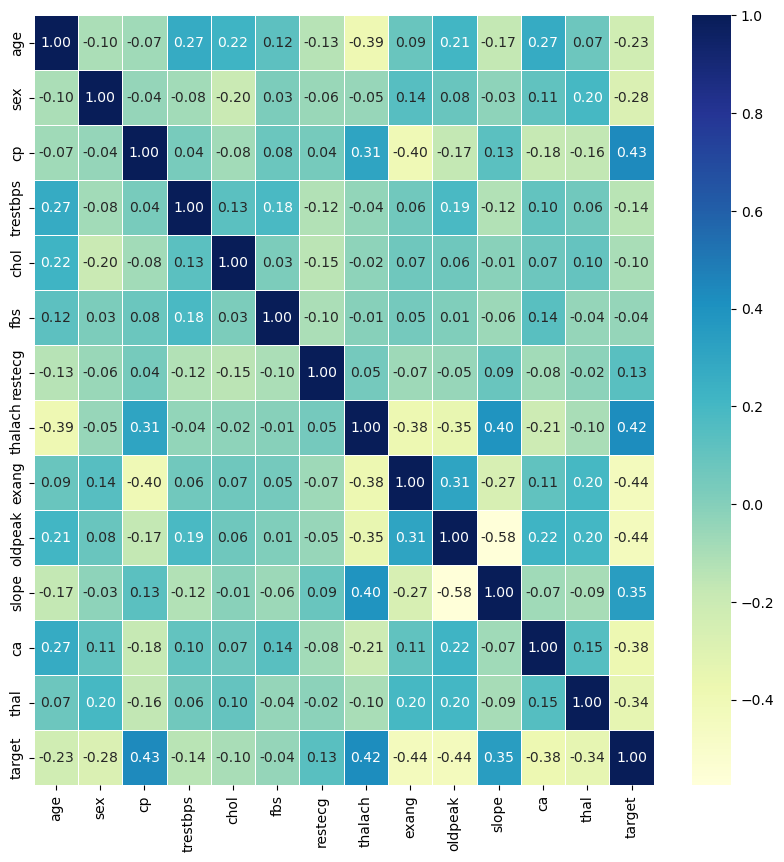

In [24]:
# Lets Draw Corelation Map
cor_map = df.corr()
home,room = plt.subplots(figsize=(10,10))
room = sns.heatmap(cor_map,
                   annot=True,
                   linewidths=0.5,
                   fmt="0.2f",
                   cmap="YlGnBu");


# 5- Modeling

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [26]:
# Split Data into test and train

X = df.drop("target",axis=1)  # axis=1 mean took entire colunm
Y = df["target"]

In [27]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [28]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [29]:
# Fix using Randomsed , so other should produce same results

np.random.seed(7)

# split into test train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)


In [30]:
len(X_train) # 80% of data

820

In [31]:
len(X) # Total Data

1025

# Choose right model from choose right estimator map(https://scikit-learn.org/stable/machine_learning_map.html)
# Models we are going to use
1- K-nearest Neighbours Classifier
2- RandomForest Classifier
3- Logistic Regression



In [32]:
# Make dictionary and use three model using loops

models = {"KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier(),
          "Logistic Regression":LogisticRegression()}

# Create function to evaluate Models

def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    np.random.seed(7)
    # MAke a dictionary to score model
    model_score = {}
    # Looping through
    for name, model in models.items():
        model.fit(X_train,Y_train)
        #Evaluate the model
        model_score[name] = model.score(X_test,Y_test)
    return model_score

In [33]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             Y_train=Y_train,
                             Y_test=Y_test)

model_scores

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7463414634146341,
 'Random Forest': 1.0,
 'Logistic Regression': 0.8780487804878049}

<Axes: >

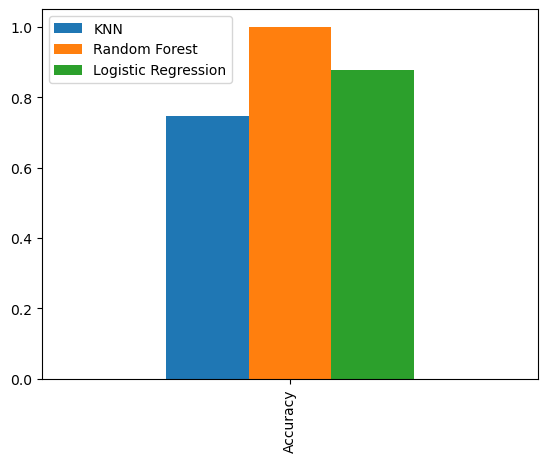

In [34]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.plot.bar()

# Improve/Tune model using 
 # Universal methods use for all Cllasification problems
  * Hyperparameter
  * Feature Improving
 # Advanced level 
 * Confusion Matrix
 * Croos Validation
 * Precision
 * Recall
 * F1-score
 * Classification Report
 * ROC Curve


* Hyperparameter
* Feature Improving

In [38]:
train_score = []
test_score = []

# create range to be test for nieghbours
nneighbours = range(1,30)

# KNN Instance
KNN = KNeighborsClassifier()

# Looping through the range 
for i in neighbors:
    KNN.set_params(n_neighbors=i)
    # run the fir for ith value
    KNN.fit(X_train,Y_train)
    # Update the Training Score
    train_score.append(KNN.score(X_train,Y_train))
    # Update the test score list
    test_score.append(KNN.score(X_test,Y_test))

NameError: name 'neighbors' is not defined

In [39]:
train_score

[]

In [40]:
test_score

[]

# Plot the accuracy Acore 

ValueError: x and y must have same first dimension, but have shapes (29,) and (0,)

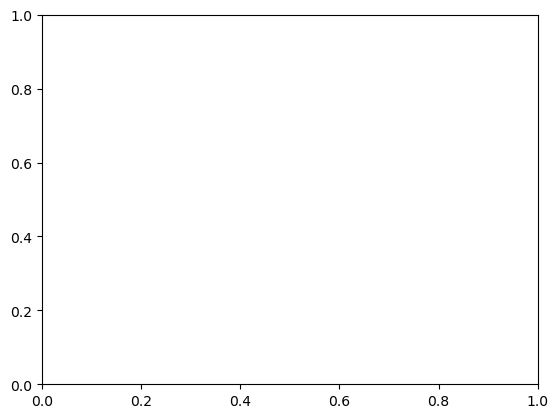

In [41]:
plt.plot(nneighbours,train_score, label="Train Score")
plt.plot(nneighbours,test_score, label="TestScore")
plt.xticks(np.arange(1,31,1))
plt.xlabel("Numbers of N-Neighbours")
plt.ylabel("Model accuracy")
plt.legend()

print(f"Max KNN Score:{max(test_score*100)}%") # 98% on N-neighbours = 25

# Hyperparameter Tunning using Randimized Search CV

* LogisticRegression()
* RandomForestClassifier

In [42]:
# Check hyperparameters from documentation 
# 1- solver
# 2- C

LR_hp = {
    "C": np.logspace(-4,4,20),
    "solver": ["liblinear"]   
}
RFC_hp = {
    "n_estimators": np.arange(10,1600,100),
    "max_depth": [None,3,5,6,10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_split": np.arange(1,20,2)
}

In [43]:
# Tune LogistricRegression
np.random.seed(7)

# Lets use RSCV to tune HP

lr = RandomizedSearchCV(LogisticRegression(),
                        param_distributions=LR_hp,
                        cv=5,
                        n_iter=20,
                        verbose=True)
# Fit the random HP search model for LR
lr.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [44]:
lr.score(X_test,Y_test) # No bigg improvement after HP tuning last result was 87%

0.8682926829268293

In [45]:
lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [46]:
# Tune RandomForestClassifeir
np.random.seed(7)

# Lets use RSCV to tune HP

rfc = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=RFC_hp,
                        cv=5,
                        n_iter=20,
                        verbose=True)
# Fit the random HP search model for LR
rfc.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits



KeyboardInterrupt



In [ ]:
rfc.score(X_test,Y_test)

In [ ]:
rfc.best_params_

* 'KNN': 0.7463414634146341, we have already dropped it
* 'Random Forest': 1.0, same after Hp tuning
* 'Logistic Regression': 0.8780487804878049 , after HP tuning 0.8682926829268293

* 1-By hand Hyperparameter Tuning # done it been there, seen it all
* 2-RandomizedSearchCV # done it been there, seen it all
* 3-GridSearch CV # lets try this one

# Hyperparameter Tuning GridSearch CV

In [47]:
# Tune LogistricRegression using Grid
np.random.seed(7)

# Lets use RSCV to tune HP

lr_gs = GridSearchCV(LogisticRegression(),
                        param_grid=LR_hp,
                        cv=5,
                        verbose=True)
# Fit the random HP search model for LR
lr_gs.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [48]:
lr_gs.score(X_test,Y_test)

0.8682926829268293

In [49]:
lr_gs.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [51]:
# Tune Random Forest Classifier using Grid
# It will take alot of time so not gona rn
np.random.seed(7)

# Lets use RSCV to tune HP
RFC@_hp = {
    "n_estimators":np.arrange(1,101,50),
    "max_depth":[None,30,50],
    "min_samples_split":np.arrange(2,8,2),
    "min_samples_leaf":np.arrange(1,7,2),
    
}
rfc_gs = GridSearchCV(RandomForestClassifier(),
                        param_grid=RFC_hp,
                        cv=5,
                        verbose=True)
# Fit the random HP search model for LR
rfc_gs.fit(X_train,Y_train)

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (3804775233.py, line 6)

In [ ]:
rfc_gs.score(X_test,Y_test)

In [ ]:
rfc_gs.best_params_

# Improve/Tune model using 
 # Universal methods use for all Cllasification problems
  * Hyperparameter  # DONE
  * Feature Improving  # Not touched Yet
 # Advanced level 
 * Confusion Matrix
 * Croos Validation
 * Precision
 * Recall
 * F1-score
 * Classification Report
 * ROC Curve




In [52]:
# Ploting Area Under the curve
y_preds =lr_gs.predict(X_test)
plot_roc_curve(lr_gs,X_test,Y_test)

NameError: name 'plot_roc_curve' is not defined

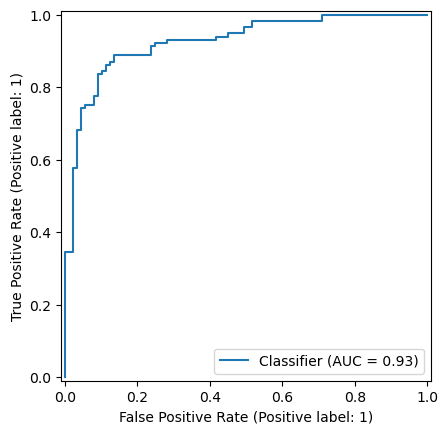

In [53]:
# Alternative code from BlackBox

from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

y_pred_proba = lr_gs.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(Y_test, y_pred_proba)
plt.show()

In [54]:
# Confusion Matrix
print(confusion_matrix(Y_test,y_preds))

[[ 75  14]
 [ 13 103]]


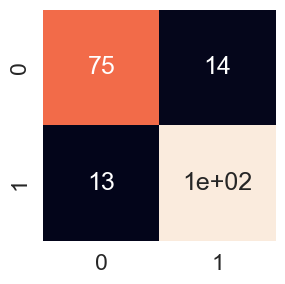

In [55]:
# Seaborn heatmap
sns.set(font_scale=1.5)

def plot_confusion(Y_test,y_preds):
    "This will plot the Confusion Matrix"

    fig,ax = plt.subplots(figsize=(3,3))
    ax  = sns.heatmap(confusion_matrix(Y_test,y_preds),
                      annot=True,
                      cbar=False)

plot_confusion(Y_test,y_preds)    
        

# Lets Plot The Classification Report

In [56]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85        89
           1       0.88      0.89      0.88       116

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



In [57]:
lr_gs.best_params_
lr = LogisticRegression(C=0.23357214690901212,
                       solver='liblinear')

In [58]:
# Cross Validated Accuracy
cv_accuracy = cross_val_score(lr,
                              X,
                              Y,
                              cv=7,
                              scoring="accuracy")
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8438702291092562

In [63]:
# Cross Validated precision
cv_precision = cross_val_score(lr,
                              X,
                              Y,
                              cv=7,
                              scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8173379340661772

In [64]:
# Cross Validated recall
cv_recall = cross_val_score(lr,
                              X,
                              Y,
                              cv=7,
                              scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8992731829573934

In [65]:
# Cross Validated f1-score
cv_f1 = cross_val_score(lr,
                              X,
                              Y,
                              cv=7,
                              scoring="f1")
cv_f1  = np.mean(cv_f1 )
cv_f1 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8559661490334498

# Visualizing Croos Validated Matrix

<Axes: title={'center': 'Comparison of Matrices'}>

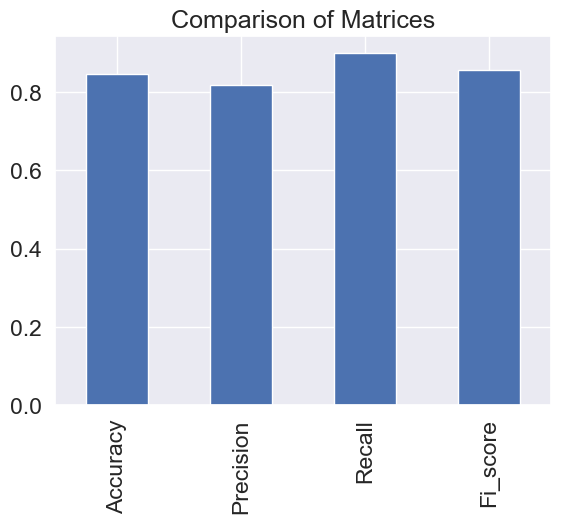

In [68]:
cv_plot = pd.DataFrame({
    "Accuracy":cv_accuracy,
    "Precision":cv_precision,
    "Recall":cv_recall,
    "Fi_score":cv_f1   
},index=[0])
cv_plot.T.plot.bar(title='Comparison of Matrices',
                legend=False)

# Feature Improving # Not touched Yet

In [69]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [60]:
# Check Coefficient
lr.fit(X_train,Y_train)


LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [61]:
# Coefficent is relation of feaures with target
lr.coef_

array([[ 0.00343736, -1.53465993,  0.76772602, -0.01324355, -0.00463399,
        -0.25892336,  0.34158905,  0.03160534, -0.82371075, -0.45637064,
         0.50388391, -0.670124  , -0.72960299]])

In [62]:
# Positive value means Positive correlated with just target while same for negative value
final_coef = dict(zip(df.columns,list(lr.coef_[0])))
final_coef

{'age': 0.0034373616692838275,
 'sex': -1.534659930873954,
 'cp': 0.7677260223876158,
 'trestbps': -0.013243551512375615,
 'chol': -0.004633992920220666,
 'fbs': -0.258923360284174,
 'restecg': 0.3415890457182023,
 'thalach': 0.03160533517259813,
 'exang': -0.8237107458561713,
 'oldpeak': -0.4563706353909644,
 'slope': 0.5038839090103902,
 'ca': -0.6701239950053312,
 'thal': -0.7296029920382988}

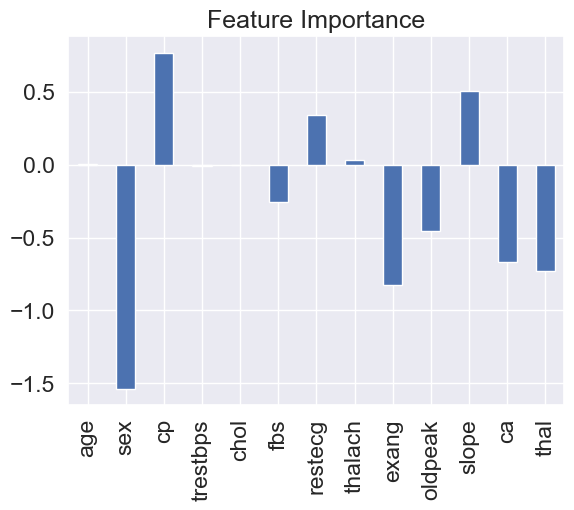

In [63]:
features = pd.DataFrame(final_coef,index=[0])
features.T.plot.bar(title="Feature Importance", legend=False);

# Conclusion
* We set 95% Accuracy goal, and we acheived it.
* If we were not able to achieve the goal the,
  * We can ask some Questions,
  * 1- What if we try to get more Data
  * 2- What if we try to improve the quality of Data
  * 3- What if we try to use others Models and see if  there is any improvemnts